In [192]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
df = pd.read_csv('Dataset/MBA.csv')
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [195]:
df['race'] = df['race'].fillna(df['race'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            6194 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [196]:
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,White,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,White,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,White,590.0,5.0,Other,NaN


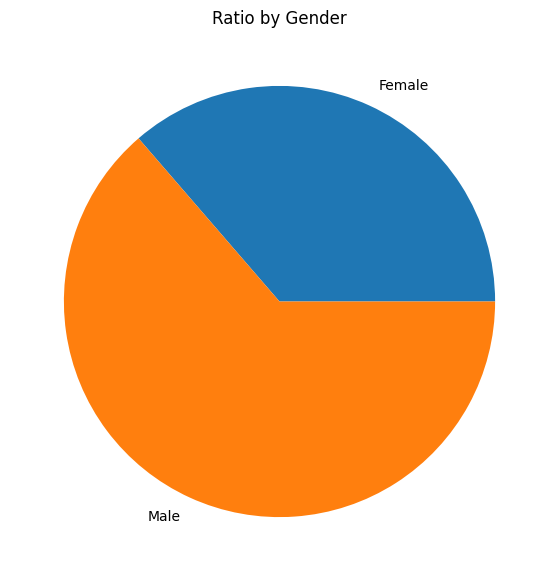

In [197]:
plt.figure(figsize=(7,7))

count_of_gender = df.groupby(['gender'])['application_id'].count()

plt.pie(x=count_of_gender,labels=['Female','Male'])
plt.title('Ratio by Gender')

plt.show()

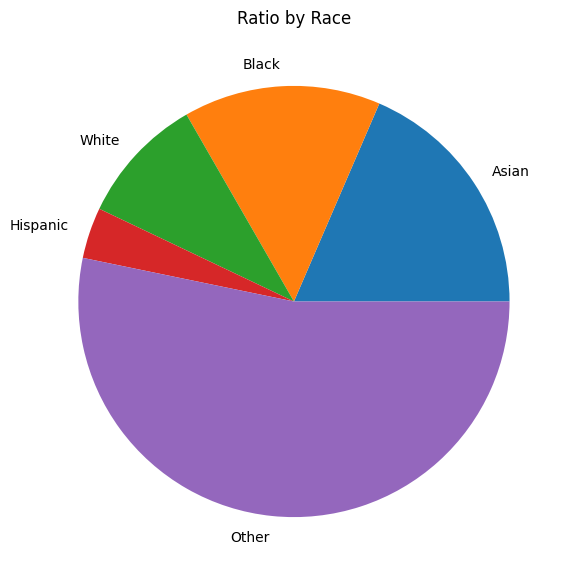

In [198]:
plt.figure(figsize=(7,7))
count_of_race = df.groupby(['race'])['application_id'].count()

plt.pie(x=count_of_race,labels=df['race'].unique())
plt.title('Ratio by Race')
plt.show()

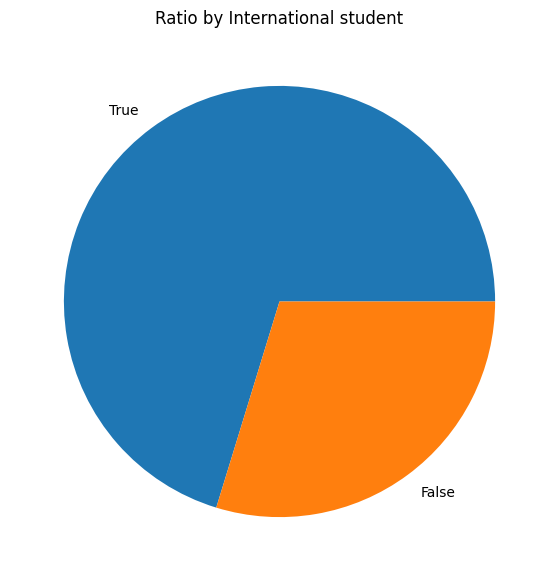

In [199]:
plt.figure(figsize=(7,7))
count_of_international = df.groupby(['international'])['application_id'].count()

plt.pie(x=count_of_international,labels=[True,False])
plt.title('Ratio by International student')
plt.show()

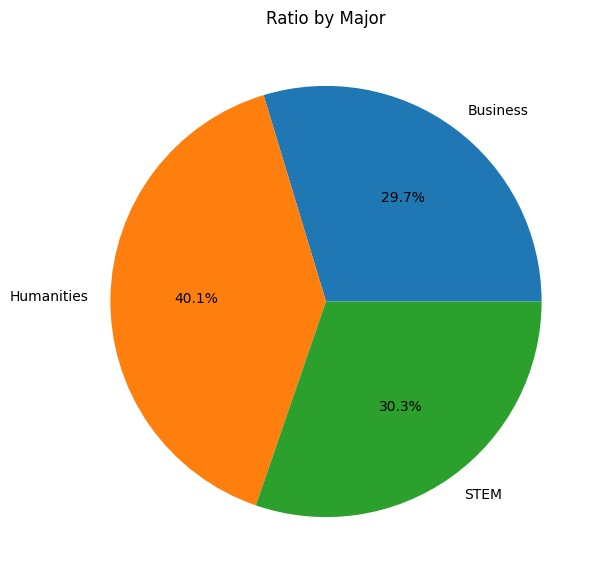

In [200]:
plt.figure(figsize=(7,7))
count_of_major = df.groupby(['major'])['application_id'].count()
plt.pie(x=count_of_major,labels=df['major'].unique(),autopct='%1.1f%%')
plt.title('Ratio by Major')
plt.show()

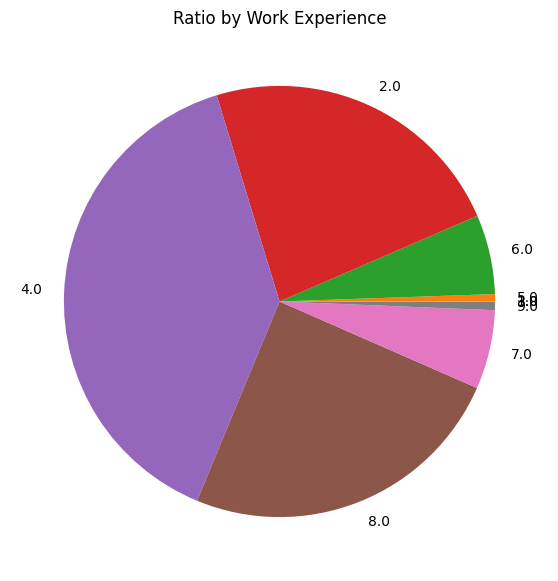

In [201]:
plt.figure(figsize=(7,7))
count_of_workexp = df.groupby(['work_exp'])['application_id'].count()
plt.pie(x=count_of_workexp,labels=df['work_exp'].unique())
plt.title('Ratio by Work Experience')
plt.show()

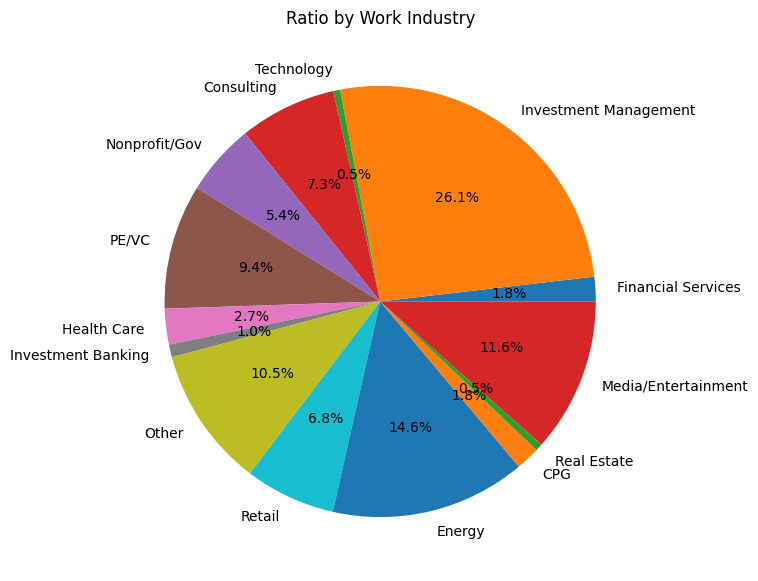

In [202]:
plt.figure(figsize=(7,7))
count_of_workind = df.groupby(['work_industry'])['application_id'].count()
plt.pie(x=count_of_workind,labels=df['work_industry'].unique(),autopct='%1.1f%%')
plt.title('Ratio by Work Industry')
plt.show()


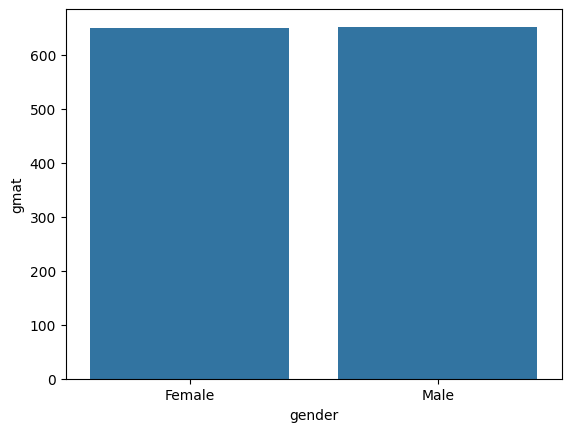

In [203]:
plt.figure()
avg_by_gender = df.groupby(['gender'])['gmat'].mean()

sns.barplot(data=avg_by_gender)
plt.show()

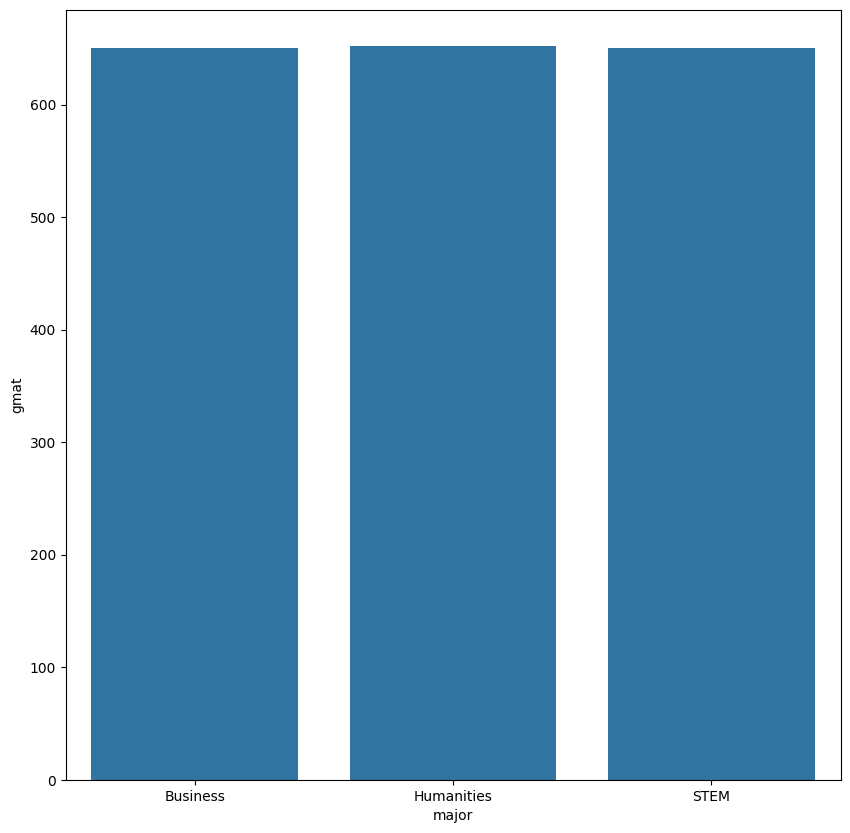

In [204]:
plt.figure(figsize=(10,10))
avg_by_major = df.groupby(['major'])['gmat'].mean()

sns.barplot(data=avg_by_major)
plt.show()

In [205]:
# Creating models
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            6194 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [206]:
X = df[['gender','international','gpa','major','race','work_exp','work_industry','gmat']]
y = df['admission']
y

0       Admit
1         NaN
2       Admit
3         NaN
4         NaN
        ...  
6189      NaN
6190      NaN
6191    Admit
6192      NaN
6193      NaN
Name: admission, Length: 6194, dtype: object

In [207]:

# List of categorical columns to encode
categorical_cols = ['gender', 'international', 'major', 'race', 'work_industry']

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column using .loc to avoid SettingWithCopyWarning
for col in categorical_cols:
    X.loc[:, col] = le.fit_transform(X[col])

y = y.replace({'Admit':2,None:0,'Waitlist':1})

# View the updated DataFrame
X


C:\Users\Devve\AppData\Local\Temp\ipykernel_13732\3825015844.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 1 ... 1 1 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X.loc[:, col] = le.fit_transform(X[col])
C:\Users\Devve\AppData\Local\Temp\ipykernel_13732\3825015844.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'Admit':2,None:0,'Waitlist':1})


,gender,international,gpa,major,race,work_exp,work_industry,gmat
0,0,0,3.30,0,0,3.0,3,620.0
1,1,0,3.28,1,1,5.0,6,680.0
2,0,1,3.30,0,4,5.0,13,710.0
3,1,0,3.47,2,1,6.0,13,690.0
4,1,0,3.35,2,2,5.0,1,590.0
...,...,...,...,...,...,...,...,...
6189,1,0,3.49,0,4,5.0,9,640.0
6190,1,0,3.18,2,1,4.0,1,670.0
6191,0,1,3.22,0,4,5.0,4,680.0
6192,1,1,3.36,0,4,5.0,9,590.0


In [208]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train,y_train)

LinearRegression()

In [209]:
y_pred = model_linear_regression.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print('Mean squared error: ',mse)

Mean squared error:  0.44418549859936524


In [210]:
model_decision_classifier = DecisionTreeClassifier()

model_decision_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [211]:
y_pred = model_decision_classifier.predict(X_test)

accuracy_score = accuracy_score(y_test,y_pred)
print('Accuracy Score: ',accuracy_score)

Accuracy Score:  0.7796610169491526


In [214]:
# testing
data = pd.DataFrame({'gender':[1],'international':[1],'gpa':[3],'major':[1],'race':[4],'work_exp':[1],'work_industry':[1],'gmat':[600]})

y_pred = model_decision_classifier.predict(data)
y_pred

array([0])